In [0]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.signal

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
ls 'gdrive/My Drive/left_fist.npy'

'gdrive/My Drive/left_fist.npy'


In [0]:
left_fist = np.load('gdrive/My Drive/left_fist.npy')
right_fist = np.load('gdrive/My Drive/right_fist.npy')
both_fist = np.load('gdrive/My Drive/both_fist.npy')
both_feet = np.load('gdrive/My Drive/both_feet.npy')

In [5]:
left_fist = np.array(left_fist[:530])
right_fist = np.array(right_fist[:530])
both_fist = np.array(both_fist)
both_feet = np.array(both_feet)
print(left_fist.shape)
print(right_fist.shape)
print(both_fist.shape)
print(both_feet.shape)

(530, 64, 113)
(530, 64, 113)
(530, 64, 113)
(530, 64, 113)


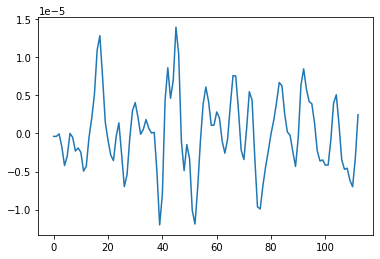

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


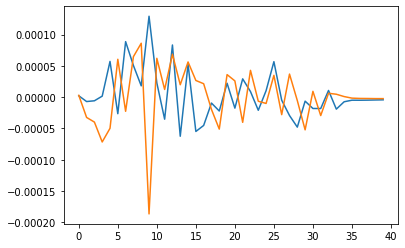

In [6]:
#plt.plot(left_fist[0][0])
#plt.show()
plt.plot(right_fist[0][0])
plt.show()
#plt.plot(np.fft.fft(both_fist[0][0])[:40])
plt.plot(np.fft.fft(left_fist[0][0])[:40])
plt.plot(np.fft.fft(right_fist[0][0])[:40])

#plt.plot(both_fist[0][0])
#plt.show()
#plt.plot(both_feet[0][0])

/usr/local/lib/python3.6/dist-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 113, using nperseg = 113
  .format(nperseg, input_length))
/usr/local/lib/python3.6/dist-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 113, using nperseg = 113
  .format(nperseg, input_length))


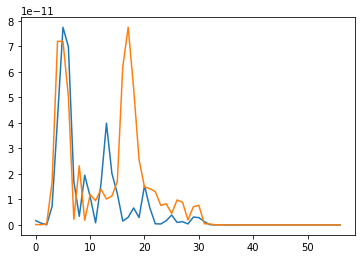

In [7]:
plt.plot(scipy.signal.welch(left_fist)[1][90][8])
plt.plot(scipy.signal.welch(right_fist)[1][90][8])
#plt.plot(both_fist[0][0])
#plt.plot(both_feet[0][0])

In [8]:
print(abs(np.sum(left_fist[0][0] - right_fist[0][0])))
print(abs(np.sum(left_fist[0][0] - both_fist[0][0])))
print(abs(np.sum(left_fist[0][0] - both_feet[0][0])))
print(abs(np.sum(both_feet[0][0] - both_fist[0][0])))

6.853359500868575e-07
1.6039158473338503e-05
3.0591367277883825e-05
1.4552208804545327e-05


In [9]:
6.85335950086766e-07

6.85335950086766e-07

In [0]:
events = np.zeros((2120,4))
ones = np.ones((530,))

In [0]:
# left fist
events[:530,0] = events[:530,0] + ones
# right fist
events[530:1060,1] = events[530:1060,1] + ones
# both fist 
events[1060:1590,2] = events[1060:1590,2] + ones
# both feet
events[1590:,3] = events[1590:,3] + ones

In [0]:
def preprocessing(data):
    mean = np.mean(data, axis = 0)    
    var = np.var(data, axis = 0)
    data = (data - mean)/var
    return data
#data_array = preprocessing(data)

In [0]:
left_fist1 = left_fist.reshape((530, 7232))
left_fist1 = preprocessing(left_fist1)
right_fist1 = right_fist.reshape((530, 7232))
right_fist1 = preprocessing(right_fist1)

In [0]:
both_fist1 = both_fist.reshape((530, 7232))
both_fist1 = preprocessing(both_fist1)
both_feet1 = both_feet.reshape((530, 7232))
both_feet1 = preprocessing(both_feet1)

In [15]:
print(left_fist1.shape)
print(right_fist1.shape)
print(both_fist1.shape)
print(both_feet1.shape)

(530, 7232)
(530, 7232)
(530, 7232)
(530, 7232)


In [16]:
# fast fourier transform
a = np.fft.fft(left_fist)[:,:,:40]
a.shape

(530, 64, 40)

In [0]:
f_left_fist = np.fft.fft(left_fist)[:,:,:40].real
f_left_fist = preprocessing(f_left_fist).reshape((530,2560))
f_right_fist = np.fft.fft(right_fist)[:,:,:40].real
f_right_fist = preprocessing(f_right_fist).reshape((530,2560))
f_both_fist = np.fft.fft(both_fist)[:,:,:40].real
f_both_fist = preprocessing(f_both_fist).reshape((530,2560))
f_both_feet = np.fft.fft(both_feet)[:,:,:40].real
f_both_feet = preprocessing(f_both_feet).reshape((530,2560))

In [81]:
print(f_left_fist.shape)
print(f_right_fist.shape)
print(f_both_fist.shape)
print(f_both_feet.shape)

(530, 2560)
(530, 2560)
(530, 2560)
(530, 2560)


In [0]:
# Power Spectral Density

In [20]:
import scipy
_,psd_left_fist = scipy.signal.welch(left_fist)
_,psd_right_fist = scipy.signal.welch(right_fist)
_,psd_both_fist = scipy.signal.welch(both_fist)
_,psd_both_feet = scipy.signal.welch(both_feet)

/usr/local/lib/python3.6/dist-packages/scipy/signal/spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 113, using nperseg = 113
  .format(nperseg, input_length))


In [0]:
psd_left_fist = psd_left_fist.reshape((530, 3648))
psd_right_fist = psd_right_fist.reshape((530, 3648))
psd_both_fist = psd_both_fist.reshape((530, 3648))
psd_both_feet = psd_both_feet.reshape((530, 3648))

In [0]:
psd_left_fist = preprocessing(psd_left_fist)
psd_right_fist = preprocessing(psd_right_fist)
psd_both_fist = preprocessing(psd_both_fist)
psd_both_feet = preprocessing(psd_both_feet)

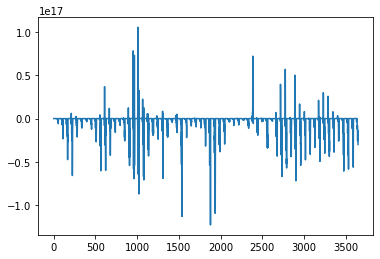

In [23]:
plt.plot(psd_left_fist[0])

In [82]:
fft_data = np.concatenate((f_left_fist, f_right_fist, f_both_fist, f_both_feet), axis = 0)
fft_data.shape

(2120, 2560)

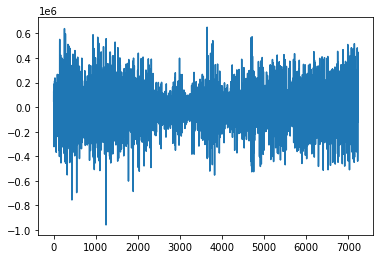

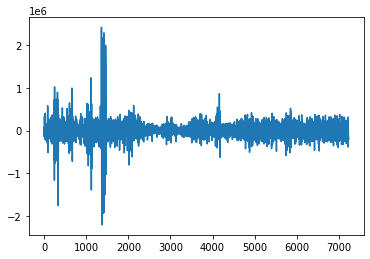

In [38]:
plt.plot(power_data[0])
plt.show()
plt.plot(power_data[-1])

In [26]:
fft_data = np.concatenate((f_left_fist, f_right_fist, f_both_fist, f_both_feet), axis = 0)
fft_data.shape

(2120, 2560)

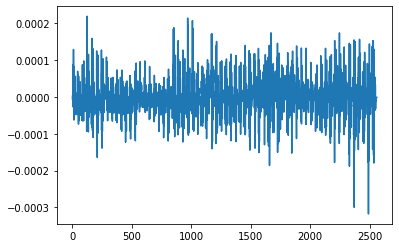

In [27]:
plt.plot(fft_data[0])

In [28]:
psd_data = np.concatenate((psd_left_fist, psd_right_fist, psd_both_fist, psd_both_feet), axis = 0)
psd_data.shape

(2120, 3648)

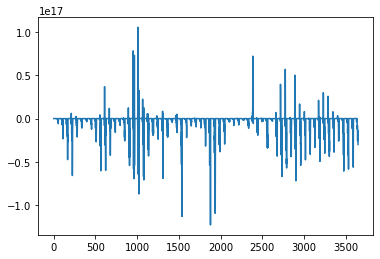

In [29]:
plt.plot(psd_data[0])

In [96]:
new_power_data = psd_data.reshape((2120, 3648, 1))
events.shape

(2120, 4)

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import StandardScaler # Used for scaling of data
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import metrics
import matplotlib.pyplot as plt
from tensorflow.keras import backend as K
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv1D, Conv2D, LSTM
from tensorflow.keras.layers import MaxPooling1D, AveragePooling2D
from tensorflow.keras.layers import LeakyReLU, BatchNormalization

In [97]:
x_train, x_test, y_train, y_test = train_test_split(new_power_data, events, test_size=0.3, random_state=42)
x_train.shape

(1484, 3648, 1)

In [0]:
def create_model():
    # create model
    model = Sequential()
    model.add(Conv1D(filters=50, kernel_size=11, activation='relu', input_shape=(3648,1)))
    model.add(Conv1D(filters=15, kernel_size=3, activation='relu'))
    model.add(Dropout(0.5))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.3))
    model.add(BatchNormalization())
    model.add(Dense(100, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Dense(150, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(0.3))
    model.add(BatchNormalization())
    model.add(Dense(120, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Dense(15, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dense(4, activation='softmax'))


    # Compile model
    model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['acc'])
    return model

In [102]:
model = create_model()
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_20 (Conv1D)           (None, 3638, 50)          600       
_________________________________________________________________
conv1d_21 (Conv1D)           (None, 3636, 15)          2265      
_________________________________________________________________
dropout_50 (Dropout)         (None, 3636, 15)          0         
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 1818, 15)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 27270)             0         
_________________________________________________________________
dense_70 (Dense)             (None, 100)               2727100   
_________________________________________________________________
dropout_51 (Dropout)         (None, 100)             

In [103]:
history = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=100)

Epoch 1/100
47/47 [==============================] - 11s 229ms/step - loss: 1.5819 - acc: 0.3315 - val_loss: 1.2112 - val_acc: 0.5377
Epoch 2/100
47/47 [==============================] - 11s 225ms/step - loss: 1.0776 - acc: 0.5451 - val_loss: 0.8638 - val_acc: 0.8097
Epoch 3/100
47/47 [==============================] - 11s 225ms/step - loss: 0.7957 - acc: 0.6995 - val_loss: 0.5906 - val_acc: 0.8884
Epoch 4/100
47/47 [==============================] - 11s 225ms/step - loss: 0.5672 - acc: 0.8005 - val_loss: 0.3630 - val_acc: 0.9308
Epoch 5/100
47/47 [==============================] - 11s 225ms/step - loss: 0.4465 - acc: 0.8389 - val_loss: 0.1752 - val_acc: 0.9686
Epoch 6/100
47/47 [==============================] - 11s 224ms/step - loss: 0.3105 - acc: 0.9030 - val_loss: 0.1076 - val_acc: 0.9796
Epoch 7/100
47/47 [==============================] - 11s 224ms/step - loss: 0.2168 - acc: 0.9407 - val_loss: 0.0582 - val_acc: 0.9858
Epoch 8/100
47/47 [==============================] - 11s 228ms

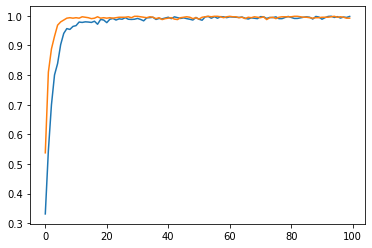

In [104]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

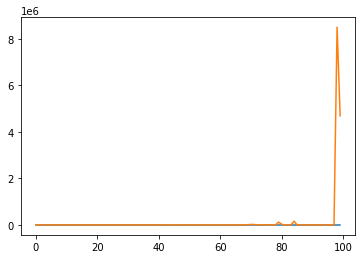

In [105]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

In [0]:
x_train, x_test, y_train, y_test = train_test_split(new_power_data, events, test_size=0.2, random_state=42)
x_train.shape

In [0]:
model.save('bci_motor_imaginary.h5')

In [0]:
raw_test = mne.io.read_raw_edf('C:/Users/Pushkar Khetrapal/Documents/BCI/files/S001/S001R04.edf', preload = True)
raw_test.rename_channels(lambda s: s.strip('.'))
events_from_annot, event_dict = mne.events_from_annotations(raw_test)
raw_test.set_eeg_reference("average", projection = True)
montage = mne.channels.read_montage("standard_1020")
raw_test.set_montage(montage)
raw_test.filter(l_freq=6, h_freq=40)

Extracting EDF parameters from C:\Users\Pushkar Khetrapal\Documents\BCI\files\S001\S001R04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 19999  =      0.000 ...   124.994 secs...
Used Annotations descriptions: ['T0', 'T1', 'T2']
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 6 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 6.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 5.00 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter le

c:\users\pushkar khetrapal\appdata\local\programs\python\python37\lib\site-packages\mne\utils\docs.py:830: DeprecationWarning: Function read_montage is deprecated; ``read_montage`` is deprecated and will be removed in v0.20. Please use ``read_dig_fif``, ``read_dig_egi``, ``read_custom_montage``, or ``read_dig_captrack`` to read a digitization based on your needs instead; or ``make_standard_montage`` to create ``DigMontage`` based on template; or ``make_dig_montage`` to create a ``DigMontage`` out of np.arrays
  warnings.warn(msg, category=DeprecationWarning)
c:\users\pushkar khetrapal\appdata\local\programs\python\python37\lib\site-packages\mne\utils\docs.py:813: DeprecationWarning: Class Montage is deprecated; Montage class is deprecated and will be removed in v0.20. Please use DigMontage instead.
  warnings.warn(msg, category=DeprecationWarning)
<ipython-input-60-325172ca0cb0>:6: DeprecationWarning: Setting a montage using anything rather than DigMontage is deprecated and will raise 

<RawEDF  |  S001R04.edf, n_channels x n_times : 64 x 20000 (125.0 sec), ~9.9 MB, data loaded>

In [0]:
events_from_annot

array([[    0,     0,     1],
       [  672,     0,     3],
       [ 1328,     0,     1],
       [ 2000,     0,     2],
       [ 2656,     0,     1],
       [ 3328,     0,     2],
       [ 3984,     0,     1],
       [ 4656,     0,     3],
       [ 5312,     0,     1],
       [ 5984,     0,     3],
       [ 6640,     0,     1],
       [ 7312,     0,     2],
       [ 7968,     0,     1],
       [ 8640,     0,     3],
       [ 9296,     0,     1],
       [ 9968,     0,     2],
       [10624,     0,     1],
       [11296,     0,     3],
       [11952,     0,     1],
       [12624,     0,     2],
       [13280,     0,     1],
       [13952,     0,     2],
       [14608,     0,     1],
       [15280,     0,     3],
       [15936,     0,     1],
       [16608,     0,     2],
       [17264,     0,     1],
       [17936,     0,     3],
       [18592,     0,     1],
       [19264,     0,     2]])

In [0]:
test_data = raw_test.get_data()

In [0]:
test_data = test_data[:,events_from_annot[3][0]-32:events_from_annot[3][0]+81]

In [0]:
test_data.shape

(64, 113)

In [0]:
test_data1 = test_data.reshape((1,7232))
test_data1 = preprocessing(test_data1)

c:\users\pushkar khetrapal\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


In [0]:
test_data2 = np.fft.fft(test_data).real.reshape((1,7232))
test_data2 = preprocessing(test_data2)

c:\users\pushkar khetrapal\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


In [0]:
_,psd_test = scipy.signal.welch(test_data)
psd_test = psd_test.reshape((1, 3648))

In [0]:
tdata = np.concatenate((test_data1, test_data2), axis = 1)
tdata = np.concatenate((tdata, psd_test), axis = 1)
tdata.shape

(1, 18112)

In [0]:
tdata = tdata.reshape((18112, 1))

In [0]:
model.predict(aaa)

array([[1.5523903e-03, 7.5171777e-04, 9.9760675e-01, 8.9120600e-05]],
      dtype=float32)

In [0]:
aaa = new_data[1500]

In [0]:
aaa = aaa.reshape((1, 18112, 1))

In [0]:
tdata

array([[           nan],
       [           nan],
       [           nan],
       ...,
       [8.57619249e-20],
       [4.59099722e-18],
       [7.67139276e-19]])